Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"



Prepare DATASET

In [2]:

train = ImageDataGenerator(rescale=1/255,validation_split=0.2)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/train",
                                          target_size=(32,32),
                                          batch_size = 30,
                                          class_mode = 'binary',subset='training')

validation_dataset = train.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/train",
                                          target_size=(32,32),
                                          batch_size = 30,
                                          class_mode = 'binary',subset='validation')                                    
test_dataset = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')

test_dataset.class_indices

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


{'SNGAN_bilinear_test': 0, 'imagewoof_test': 1}

Design Model

In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(keras.layers.MaxPool2D(2,2))


# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(32,activation='relu'))

# Output layer with single neuron which gives 0 for fake or 1 for real 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-01 12:36:35.746705: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-01 12:36:35.746822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training

Usually with every epoch increasing, loss goes lower and accuracy goes higher. But with val_loss and val_acc, many cases can be possible:

val_loss starts increasing, val_acc starts decreasing(means model is cramming values not learning)

val_loss starts increasing, val_acc also increases.(could be case of overfitting or diverse probability values in cases softmax is used in output layer)

val_loss starts decreasing, val_acc starts increasing(Correct, means model build is learning and working fine)

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(train_dataset,
        #  steps_per_epoch = 25,
         epochs = 120,
         callbacks=[early_stopping],
         validation_data = validation_dataset
         )

Epoch 1/120


2022-06-01 12:36:35.865445: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/43 [..............................] - ETA: 17s - loss: 0.7109 - accuracy: 0.4000

2022-06-01 12:36:36.125910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 1s 13ms/step - loss: 0.6495 - accuracy: 0.6195 - val_loss: 0.5617 - val_accuracy: 0.7969
Epoch 2/120
 7/43 [===>..........................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7476

2022-06-01 12:36:36.758769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 0s 11ms/step - loss: 0.4897 - accuracy: 0.7828 - val_loss: 0.4406 - val_accuracy: 0.8000
Epoch 3/120
43/43 [==============================] - 0s 11ms/step - loss: 0.3797 - accuracy: 0.8508 - val_loss: 0.3457 - val_accuracy: 0.8656
Epoch 4/120
43/43 [==============================] - 0s 11ms/step - loss: 0.3042 - accuracy: 0.8852 - val_loss: 0.3305 - val_accuracy: 0.8469
Epoch 5/120
43/43 [==============================] - 0s 11ms/step - loss: 0.2519 - accuracy: 0.9148 - val_loss: 0.4264 - val_accuracy: 0.8219
Epoch 6/120
43/43 [==============================] - 0s 11ms/step - loss: 0.2197 - accuracy: 0.9258 - val_loss: 0.2464 - val_accuracy: 0.9000
Epoch 7/120
43/43 [==============================] - 0s 11ms/step - loss: 0.1732 - accuracy: 0.9453 - val_loss: 0.2532 - val_accuracy: 0.8938
Epoch 8/120
43/43 [==============================] - 0s 11ms/step - loss: 0.1586 - accuracy: 0.9500 - val_loss: 0.2241 - val_accuracy: 0.9000
Epoch 9/120
43/43 

ValueError: x and y must have same first dimension, but have shapes (45,) and (42,)

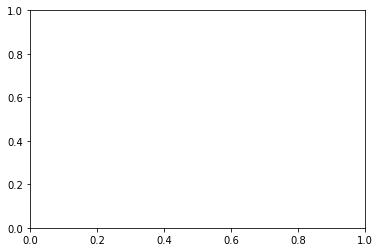

In [5]:
# visualizing losses and accuracy
# print(history.history)
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(45)

plt.figure()
plt.plot(xc, train_loss,label = 'Train Loss')
plt.plot(xc, val_loss,label = 'Val Loss')
plt.legend(loc='upper right')

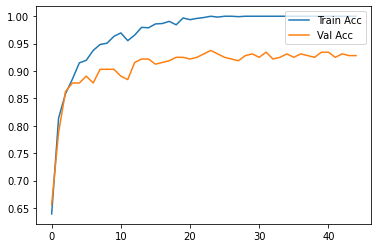

In [ ]:
plt.figure()
plt.plot(xc, train_acc,label = 'Train Acc')
plt.plot(xc, val_acc,label = 'Val Acc')
plt.legend(loc='upper right')

In [ ]:
_, acc = model.evaluate(test_dataset)
print('Trained with Bilinear')
print('Bilinear: ' ,acc *100)

test_dataset2 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bicubic/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset2)
print('Bicubic: ' ,acc *100)

test_dataset3 = test.flow_from_directory("/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/pixelsuffle/test",
                                          target_size=(32,32),
                                          batch_size =30,
                                          class_mode = 'binary')

_, acc = model.evaluate(test_dataset3)
print('Pixelsuffle: ' ,acc *100)

14/14 [==============================] - 0s 11ms/step - loss: 0.1812 - accuracy: 0.9400
Trained with Bilinear
Bilinear:  93.99999976158142
Found 400 images belonging to 2 classes.
14/14 [==============================] - 0s 6ms/step - loss: 1.8336 - accuracy: 0.5975
Bicubic:  59.74999666213989
Found 400 images belonging to 2 classes.
14/14 [==============================] - 0s 5ms/step - loss: 1.7709 - accuracy: 0.5750
Pixelsuffle:  57.499998807907104


Prediction

[[1.]]


2022-05-19 14:33:11.938339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


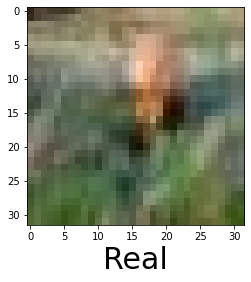

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(32,32))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Real",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Fake",fontsize=30)

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test/imagewoof_test/952.jpg")


[[0.]]


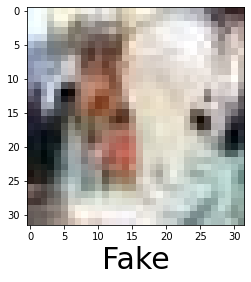

In [ ]:

predictImage(r"/Users/nayansavaliya/Masters Mechatronics/2022 Summer/RAML - Project/data/bilinear/test/SNGAN_bilinear_test/920.jpg")